In [98]:
# Tabulation of data before preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_excel("datasets/IEA_EDGAR_CO2_1970_2023.xlsx", sheet_name="IPCC 2006", skiprows=9)
#df.fillna(0, inplace=True) #Assume every naN is 0... FALLACY!
Singapore_Data = df[df["Country_code_A3"] == "SGP"].iloc[:, 8:62] # from 1971 to 2023 data for SG Data
Singapore_Data_Labels = df[df["Country_code_A3"] == "SGP"].iloc[:, 5] # Labeling of plots 
Singapore_Data.index= Singapore_Data_Labels.tolist() #changing the headings of each row
Singapore_Data.columns = Singapore_Data.columns.str.extract(r'(\d+)', expand=False).astype(int) #gets digits character and converts them into integers (years)

display(Singapore_Data)
display(Singapore_Data.T.describe())

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Main Activity Electricity and Heat Production,2233.573410,2233.573410,2705.245770,3240.123300,3255.012300,3416.421060,3718.509750,4040.264790,4629.853910,4832.225490,...,19838.483040,19943.743190,20322.559360,20690.865988,20493.308424,20856.038352,20506.041021,21535.414264,21171.592377,20002.968096
Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,1555.740000,1555.740000,2349.167400,2458.069200,2706.987600,2364.724800,2458.069200,2738.102400,3425.507710,3695.064820,...,4633.346250,4857.682500,4992.898680,5360.096232,5302.795797,4970.001762,4144.053789,4209.267915,4636.079827,4474.553777
Manufacturing Industries and Construction,415.846380,415.846380,303.550740,378.038100,512.125860,578.031420,686.751000,727.397310,834.921890,876.267660,...,12595.404680,12797.956600,11638.959810,14037.759330,12301.259170,12369.230055,12244.005051,13004.011138,13431.757384,14240.252101
Civil Aviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.474760,3.042325,6.945510,9.482525,12.492870
Road Transportation no resuspension,1527.591420,1527.591420,1612.455600,1787.354340,1738.719000,1860.838860,2042.582280,2446.545390,2593.410540,2957.105160,...,6528.415770,7001.309130,7135.338750,6333.977451,6076.858854,5986.152801,5875.423791,5816.382531,5683.442136,6372.446009
Water-borne Navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.137390,218.180040,269.516520,303.462471,307.666164,311.037714,298.152465,320.853000,337.585521,326.323347
Residential and other sectors,315.116690,315.116690,238.102850,243.245430,231.286080,196.511720,186.269030,193.829720,231.382210,269.024800,...,598.906110,606.434840,605.048730,593.021346,591.751492,576.935491,580.712667,646.083187,716.056490,725.566675
Non-Specified,11.410740,11.410740,13.531320,15.197490,20.296980,23.275890,29.385180,32.969970,40.593960,43.724340,...,1.767150,4.190670,5.503410,5.149980,8.138988,7.538157,6.413352,6.493014,6.729949,6.354758
Oil and Natural Gas,49.561885,49.561885,114.246302,103.612137,160.693995,144.687398,148.659967,160.307695,83.583939,92.251555,...,0.050266,0.049291,0.048164,0.050420,0.048062,0.045373,0.038288,0.040344,0.041957,0.040748
Cement production,373.464000,395.770960,517.608000,551.532800,580.465600,658.476000,751.046400,760.058000,798.439200,885.669200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Main Activity Electricity and Heat Production,Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,Manufacturing Industries and Construction,Civil Aviation,Road Transportation no resuspension,Water-borne Navigation,Residential and other sectors,Non-Specified,Oil and Natural Gas,Cement production,Lime production,Glass Production,Other Process Uses of Carbonates,Chemical Industry,Metal Industry,Non-Energy Products from Fuels and Solvent Use,Incineration and Open Burning of Waste
count,54.000000,54.000000,54.000000,5.000000,54.000000,15.000000,54.000000,54.000000,54.000000,34.000000,43.000000,54.000000,34.000000,40.000000,41.000000,54.000000,54.000000
mean,14672.369371,5695.930255,4414.837415,6.487598,4599.382764,378.233441,569.670438,52.004798,71.076620,893.902291,24.381090,0.190767,3.597052,4610.353113,21.178701,234.505703,26.012808
std,7577.217471,2676.276628,5025.881459,4.828734,1632.399305,171.737464,307.481004,52.399635,52.971837,423.179062,3.116940,0.065485,4.156806,3227.577628,4.219210,95.829554,9.234852
min,2233.573410,1555.740000,303.550740,0.474760,1527.591420,202.137390,186.269030,1.161270,0.038288,73.394100,21.721990,0.103704,0.038471,990.000000,12.200000,70.829794,13.908607
25%,6522.400825,3848.687588,496.947900,3.042325,3404.492183,283.834493,315.116690,6.433267,0.050305,600.302250,22.500000,0.129959,0.578997,1714.786643,18.400000,148.514246,17.424789
50%,19066.241085,4913.842131,858.095605,6.945510,5121.507690,311.037714,575.571265,42.159150,92.990344,860.224170,22.500000,0.180581,1.535400,3916.511418,20.828000,248.435676,24.664848
75%,20671.302604,7909.301160,9461.804360,9.482525,5958.470549,411.036775,644.089958,83.523083,111.240187,1153.181902,25.842777,0.252525,5.825091,7753.802031,23.820880,329.231484,34.505975
max,24363.614310,11018.656800,14240.252101,12.492870,7135.338750,705.876600,1338.929900,160.861140,160.693995,1644.578100,30.000000,0.294146,11.468794,10422.279640,30.560000,382.699553,41.983244


In [99]:
#Note, this portion of code is generated by Deepseek AI as my code is too complicated
Singapore_Data.fillna(0, inplace=True)
contributions = Singapore_Data.div(Singapore_Data.sum(axis=0), axis=1) #Returns a dataframe of each sector's proportional contribution
small_sectors = contributions[(contributions < 0.05).all(axis=1)].index
Singapore_Data.loc['Others'] = Singapore_Data.loc[small_sectors].sum()
Singapore_Data = Singapore_Data.drop(small_sectors)
display(Singapore_Data)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Main Activity Electricity and Heat Production,2233.573410,2233.573410,2705.245770,3240.123300,3255.012300,3416.42106,3718.509750,4040.264790,4629.853910,4832.225490,...,19838.483040,19943.743190,20322.559360,20690.865988,20493.308424,20856.038352,20506.041021,21535.414264,21171.592377,20002.968096
Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,1555.740000,1555.740000,2349.167400,2458.069200,2706.987600,2364.72480,2458.069200,2738.102400,3425.507710,3695.064820,...,4633.346250,4857.682500,4992.898680,5360.096232,5302.795797,4970.001762,4144.053789,4209.267915,4636.079827,4474.553777
Manufacturing Industries and Construction,415.846380,415.846380,303.550740,378.038100,512.125860,578.03142,686.751000,727.397310,834.921890,876.267660,...,12595.404680,12797.956600,11638.959810,14037.759330,12301.259170,12369.230055,12244.005051,13004.011138,13431.757384,14240.252101
Road Transportation no resuspension,1527.591420,1527.591420,1612.455600,1787.354340,1738.719000,1860.83886,2042.582280,2446.545390,2593.410540,2957.105160,...,6528.415770,7001.309130,7135.338750,6333.977451,6076.858854,5986.152801,5875.423791,5816.382531,5683.442136,6372.446009
Residential and other sectors,315.116690,315.116690,238.102850,243.245430,231.286080,196.51172,186.269030,193.829720,231.382210,269.024800,...,598.906110,606.434840,605.048730,593.021346,591.751492,576.935491,580.712667,646.083187,716.056490,725.566675
Cement production,373.464000,395.770960,517.608000,551.532800,580.465600,658.47600,751.046400,760.058000,798.439200,885.669200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chemical Industry,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,9039.051726,9319.721041,7573.296734,9123.700745,8683.381801,10363.424434,9782.224109,9677.414565,9293.112903,10422.279640
Others,167.195801,168.132221,243.361488,204.445193,285.006847,266.40864,310.539129,356.035101,293.127455,258.136377,...,641.081020,660.843764,715.779014,758.154010,775.887033,780.584620,746.855239,800.885256,825.168393,830.264940


In [100]:
#Fill data with statistically significant figures back with their missing values
Singapore_Data.loc["Cement production"] = Singapore_Data.loc["Cement production"].replace(0.000000, np.nan)
Singapore_Data.loc["Chemical Industry"] = Singapore_Data.loc["Chemical Industry"].replace(0.000000, np.nan)
display(Singapore_Data)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Main Activity Electricity and Heat Production,2233.573410,2233.573410,2705.245770,3240.123300,3255.012300,3416.42106,3718.509750,4040.264790,4629.853910,4832.225490,...,19838.483040,19943.743190,20322.559360,20690.865988,20493.308424,20856.038352,20506.041021,21535.414264,21171.592377,20002.968096
Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,1555.740000,1555.740000,2349.167400,2458.069200,2706.987600,2364.72480,2458.069200,2738.102400,3425.507710,3695.064820,...,4633.346250,4857.682500,4992.898680,5360.096232,5302.795797,4970.001762,4144.053789,4209.267915,4636.079827,4474.553777
Manufacturing Industries and Construction,415.846380,415.846380,303.550740,378.038100,512.125860,578.03142,686.751000,727.397310,834.921890,876.267660,...,12595.404680,12797.956600,11638.959810,14037.759330,12301.259170,12369.230055,12244.005051,13004.011138,13431.757384,14240.252101
Road Transportation no resuspension,1527.591420,1527.591420,1612.455600,1787.354340,1738.719000,1860.83886,2042.582280,2446.545390,2593.410540,2957.105160,...,6528.415770,7001.309130,7135.338750,6333.977451,6076.858854,5986.152801,5875.423791,5816.382531,5683.442136,6372.446009
Residential and other sectors,315.116690,315.116690,238.102850,243.245430,231.286080,196.51172,186.269030,193.829720,231.382210,269.024800,...,598.906110,606.434840,605.048730,593.021346,591.751492,576.935491,580.712667,646.083187,716.056490,725.566675
Cement production,373.464000,395.770960,517.608000,551.532800,580.465600,658.47600,751.046400,760.058000,798.439200,885.669200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chemical Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9039.051726,9319.721041,7573.296734,9123.700745,8683.381801,10363.424434,9782.224109,9677.414565,9293.112903,10422.279640
Others,167.195801,168.132221,243.361488,204.445193,285.006847,266.40864,310.539129,356.035101,293.127455,258.136377,...,641.081020,660.843764,715.779014,758.154010,775.887033,780.584620,746.855239,800.885256,825.168393,830.264940


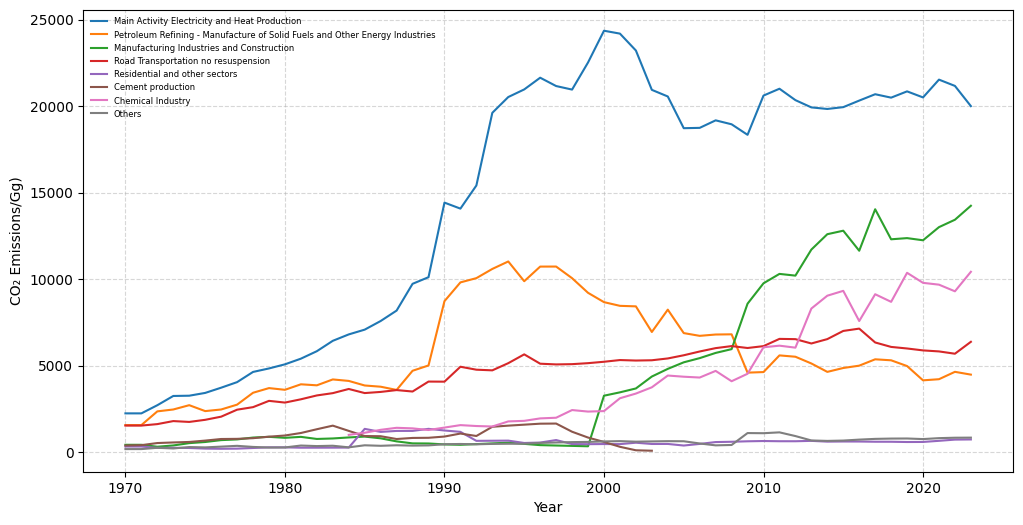

Sector: Main Activity Electricity and Heat Production is: #1f77b4 colour
Sector: Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries is: #ff7f0e colour
Sector: Manufacturing Industries and Construction is: #2ca02c colour
Sector: Road Transportation no resuspension is: #d62728 colour
Sector: Residential and other sectors is: #9467bd colour
Sector: Cement production is: #8c564b colour
Sector: Chemical Industry is: #e377c2 colour
Sector: Others is: #7f7f7f colour


In [101]:
'''After dealing with emissions in all years less than 5%, we shall impute missing data (those marked 0.000000 are data we have to impute)
below, sectors with higher than 5% may still have missing values as shown by the breaks'''
line_colors = {}

plt.ion()
fig, ax = plt.subplots(figsize=(12, 6)) 
for index, row in Singapore_Data.iterrows(): 
    line, = ax.plot(Singapore_Data.columns, row, label=index)  #label for row heading
    line_colors[index] = line.get_color()
    
ax.set_xlabel("Year") 
ax.set_ylabel("CO₂ Emissions/Gg)") #CHECK UNITS AGAIN
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(framealpha=0, fontsize=6)

plt.show()

for sector, color in line_colors.items():
    print(f"Sector: {sector} is: {color} colour")

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Main Activity Electricity and Heat Production,2233.573410,2233.573410,2705.245770,3240.123300,3255.012300,3416.42106,3718.509750,4040.264790,4629.853910,4832.225490,...,19838.483040,19943.743190,20322.559360,20690.865988,20493.308424,20856.038352,20506.041021,21535.414264,21171.592377,20002.968096
Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,1555.740000,1555.740000,2349.167400,2458.069200,2706.987600,2364.72480,2458.069200,2738.102400,3425.507710,3695.064820,...,4633.346250,4857.682500,4992.898680,5360.096232,5302.795797,4970.001762,4144.053789,4209.267915,4636.079827,4474.553777
Manufacturing Industries and Construction,415.846380,415.846380,303.550740,378.038100,512.125860,578.03142,686.751000,727.397310,834.921890,876.267660,...,12595.404680,12797.956600,11638.959810,14037.759330,12301.259170,12369.230055,12244.005051,13004.011138,13431.757384,14240.252101
Road Transportation no resuspension,1527.591420,1527.591420,1612.455600,1787.354340,1738.719000,1860.83886,2042.582280,2446.545390,2593.410540,2957.105160,...,6528.415770,7001.309130,7135.338750,6333.977451,6076.858854,5986.152801,5875.423791,5816.382531,5683.442136,6372.446009
Residential and other sectors,315.116690,315.116690,238.102850,243.245430,231.286080,196.51172,186.269030,193.829720,231.382210,269.024800,...,598.906110,606.434840,605.048730,593.021346,591.751492,576.935491,580.712667,646.083187,716.056490,725.566675
Chemical Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9039.051726,9319.721041,7573.296734,9123.700745,8683.381801,10363.424434,9782.224109,9677.414565,9293.112903,10422.279640
Others,167.195801,168.132221,243.361488,204.445193,285.006847,266.40864,310.539129,356.035101,293.127455,258.136377,...,641.081020,660.843764,715.779014,758.154010,775.887033,780.584620,746.855239,800.885256,825.168393,830.264940


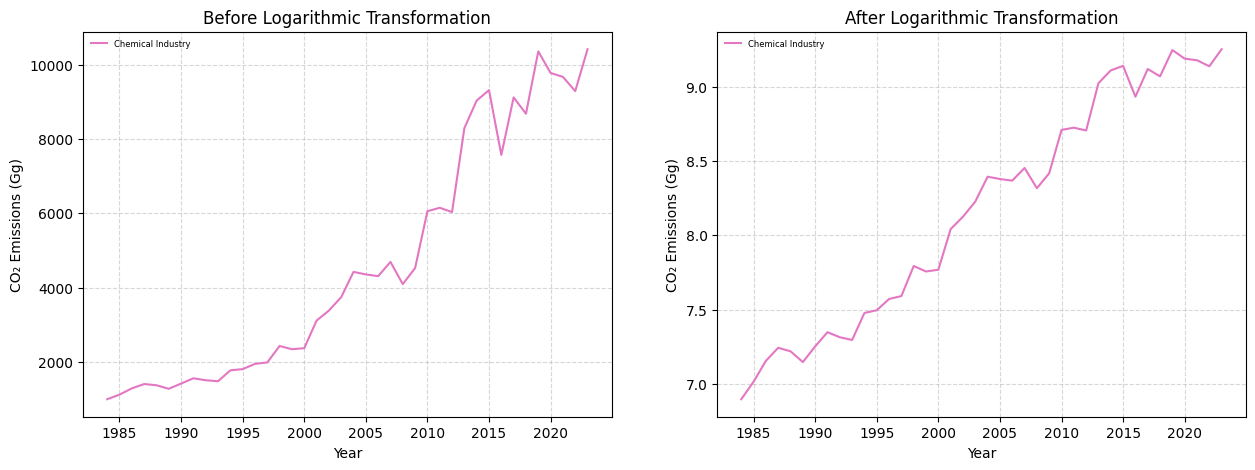

In [102]:
#Applying log transform with misisng data
Singapore_Data = Singapore_Data.drop(index="Cement production")
display(Singapore_Data)
Sectors_MissingData = Singapore_Data[Singapore_Data.isnull().any(axis=1)]
log_data = np.log(Sectors_MissingData)
plt.ion()
fig, ax = plt.subplots(1, 2, figsize=(15, 5)) 
for index, row in Sectors_MissingData.iterrows():
    ax[0].plot(Sectors_MissingData.columns, row, label=index, color=line_colors[index])

for index, row in log_data.iterrows():
    ax[1].plot(log_data.columns, row, label=index, color=line_colors[index])
    
for i in ax:
    i.set_xlabel("Year") 
    i.set_ylabel("CO₂ Emissions (Gg)")
    i.grid(True, linestyle="--", alpha=0.5)
    i.legend(framealpha=0, fontsize=6)
ax[0].set_title("Before Logarithmic Transformation")
ax[1].set_title("After Logarithmic Transformation")

plt.show()


C:\Users\polsk\AppData\Local\Temp\ipykernel_30684\4105883870.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[index].legend(framealpha=0, fontsize=6)


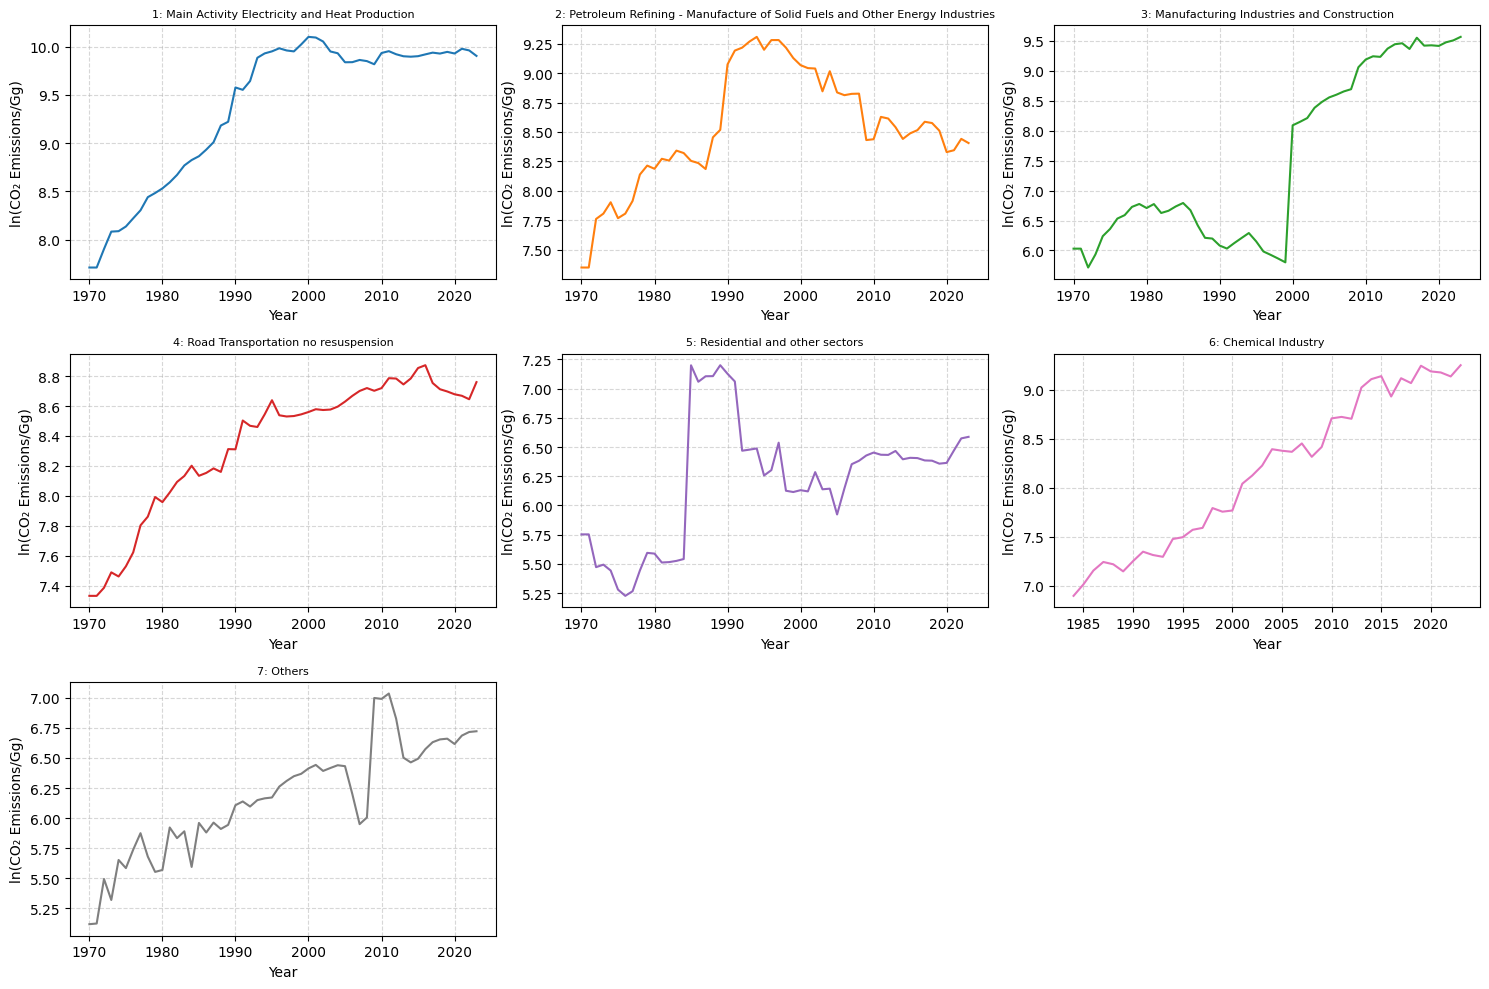

In [103]:
logFull_Data = np.log(Singapore_Data)

plt.ion()
fig, axes = plt.subplots(3,3,figsize=(15, 10)) 
axes = axes.flatten() #elements arange in 1d for easy iteration
for index, v in enumerate(logFull_Data.index):
    axes[index].plot(logFull_Data.loc[v], color=line_colors[v])
    axes[index].set_title(f"{index+1}: {v}", fontsize=8)
    axes[index].set_xlabel("Year") 
    axes[index].set_ylabel("ln(CO₂ Emissions/Gg)")
    axes[index].grid(True, linestyle="--", alpha=0.5)
    axes[index].legend(framealpha=0, fontsize=6)
    
    

fig.delaxes(axes[7])
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()



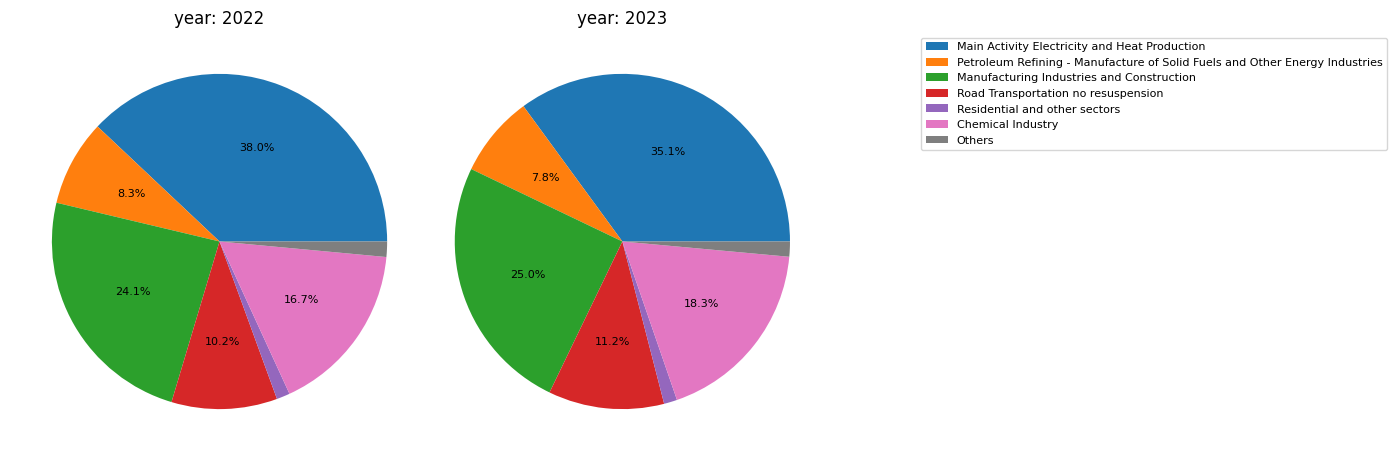

In [104]:
#Plot pie chart for multiple years
years = range(2022, 2024)
fig, ax = plt.subplots(1, len(years), figsize=(14, 6))

colors = [line_colors[sector] for sector in Singapore_Data.index]

for i,Year in enumerate(years):
    ax[i].pie(Singapore_Data[Year], autopct=lambda x: f'{x:.1f}%' if x >= 5 else '', textprops={'fontsize': 8}, colors=colors) 
    ax[i].set_title(f"year: {Year}")

ax[-1].legend(labels=Singapore_Data.index, bbox_to_anchor=(1.2, 1), loc='upper left', fontsize=8)  # Move legend outside (last subplot)

plt.tight_layout()
plt.show()

C:\Users\polsk\AppData\Local\Temp\ipykernel_30684\2343115134.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[index].legend(framealpha=0, fontsize=6)


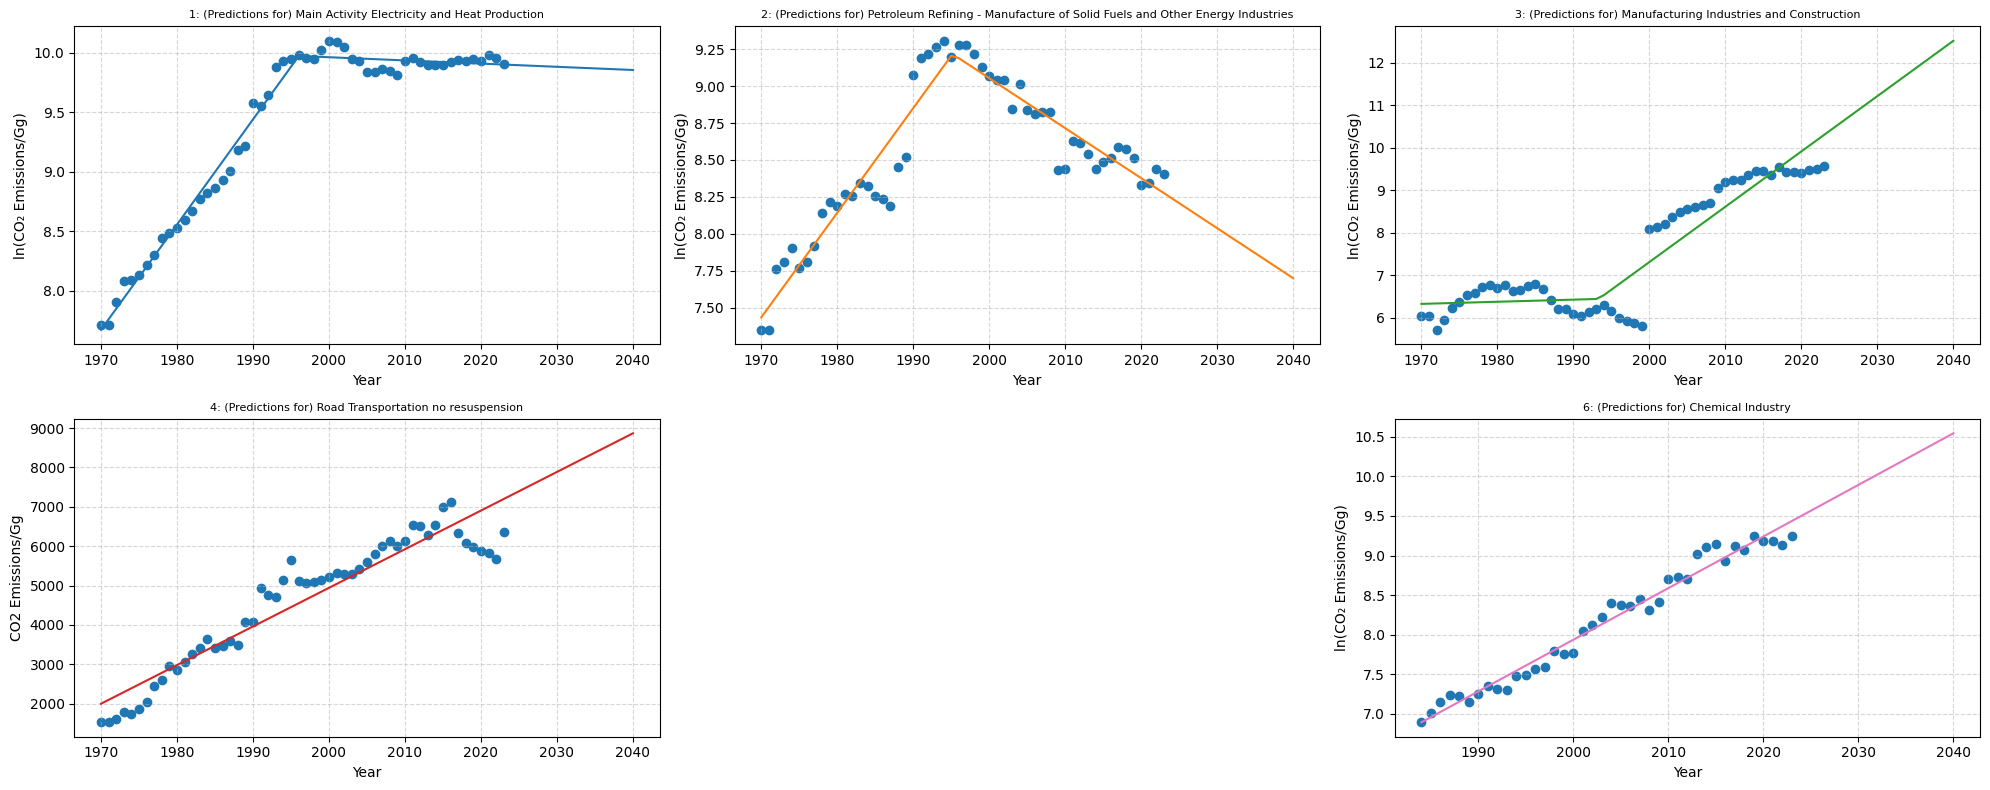

{'1: Main Activity Electricity and Heat Production': [np.float64(9.855534505314019)], '2: Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries': [np.float64(7.699056011829745)], '3: Manufacturing Industries and Construction': [np.float64(12.517586871135137)], '4: Road Transportation no resuspension': [np.float64(8868.781374418002)], '6: Chemical Industry': [np.float64(10.544026482833118)]}


In [105]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import pwlf

#Plotting, predicting using linear regression models
'''
Make a for loop, looping through 1-4 and 6 else continue

logFull_Data.index -> the sectors
logfulldata.columns -> the years 

Linear regression here uses Ordinary Least Squares Regression

'''
#This line of code is to drop 7 for better fitting

For_TabulationIn2040 = {}

Predict_Until = 2040
Predict_Until += 1 #Ensure Year 2040 does not get cut out

logFull_Data = logFull_Data.drop("Others")

fig, ax = plt.subplots(2,3,figsize=(20, 8)) 
ax = ax.flatten()

for index, v in enumerate(logFull_Data.index):
        if index==5: # 6
                ChemicalIndustry_6 = logFull_Data.loc[v].dropna() #Make it suitable for scikit to handle
                regressed_6 = LinearRegression().fit(ChemicalIndustry_6.index.values.reshape(-1, 1), ChemicalIndustry_6.values)
                Regressed_Year = np.arange(ChemicalIndustry_6.index[0], Predict_Until).reshape(-1,1)
                Predicted_6 = regressed_6.predict(Regressed_Year)
                ax[index].plot(np.arange(ChemicalIndustry_6.index[0], Predict_Until), Predicted_6, color=line_colors[v])
                ax[index].scatter(logFull_Data.columns,logFull_Data.loc[v])
                For_TabulationIn2040[f"{index+1}: {v}"] = []
                For_TabulationIn2040[f"{index+1}: {v}"].append(Predicted_6[-1])
        elif index==3:
                RoadTransport_4 = Singapore_Data.loc[v].dropna()
                regressed_4 = LinearRegression().fit(RoadTransport_4.index.values.reshape(-1,1), RoadTransport_4.values)
                Regressed_Year = np.arange(RoadTransport_4.index[0], Predict_Until).reshape(-1,1)
                Predicted_4 = regressed_4.predict(Regressed_Year)
                ax[index].plot(np.arange(RoadTransport_4.index[0], Predict_Until), Predicted_4, color=line_colors[v])
                ax[index].scatter(logFull_Data.columns,Singapore_Data.loc[v])
                For_TabulationIn2040[f"{index+1}: {v}"] = []
                For_TabulationIn2040[f"{index+1}: {v}"].append(Predicted_4[-1])
        elif index<=2:
                SectorData_Index = logFull_Data.loc[v].dropna()
                PWLF_Model = pwlf.PiecewiseLinFit(SectorData_Index.index.values, SectorData_Index.values)
                Breaks = PWLF_Model.fit(2)
                Predict_Index = PWLF_Model.predict(np.arange(SectorData_Index.index[0], Predict_Until))
                ax[index].plot(np.arange(SectorData_Index.index[0], Predict_Until), Predict_Index, color=line_colors[v])
                ax[index].scatter(logFull_Data.columns,logFull_Data.loc[v])
                For_TabulationIn2040[f"{index+1}: {v}"] = []
                For_TabulationIn2040[f"{index+1}: {v}"].append(Predict_Index[-1])
        else:
                ax[index].set_visible(False)

for index, v in enumerate(logFull_Data.index):
        if index ==3:
                ax[index].set_ylabel("CO2 Emissions/Gg")
        else:
                ax[index].set_ylabel("ln(CO₂ Emissions/Gg)") 
        ax[index].set_xlabel("Year") 
        ax[index].grid(True, linestyle="--", alpha=0.5)
        ax[index].legend(framealpha=0, fontsize=6)
        ax[index].set_title(f"{index+1}: (Predictions for) {v}", fontsize=8)
        
plt.tight_layout()
plt.ion()
plt.show()

print(For_TabulationIn2040)

In [106]:
#ADF TEST: FOR FUN ONLYYY :D
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series, regression='ct') #constant and trend, may be highly vulnerable and fail when there mayy be 2 different trends
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))

for index, sector in enumerate(logFull_Data.index):
    print(f"for sector on {sector} {adf_test(logFull_Data.loc[sector].dropna())}, with {len(logFull_Data.loc[sector].dropna())} datapoints")


ADF Statistic:  -0.6491375888345231
P-Value:  0.9762845346392306
Critical Values:
	1%: -4.14
	5%: -3.50
	10%: -3.18
for sector on Main Activity Electricity and Heat Production None, with 54 datapoints
ADF Statistic:  -1.5945815420062779
P-Value:  0.7945470051946123
Critical Values:
	1%: -4.14
	5%: -3.50
	10%: -3.18
for sector on Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries None, with 54 datapoints
ADF Statistic:  -1.8360621119782432
P-Value:  0.6871152947138297
Critical Values:
	1%: -4.14
	5%: -3.50
	10%: -3.18
for sector on Manufacturing Industries and Construction None, with 54 datapoints
ADF Statistic:  -1.4897419827328466
P-Value:  0.8326176950748368
Critical Values:
	1%: -4.14
	5%: -3.50
	10%: -3.18
for sector on Road Transportation no resuspension None, with 54 datapoints
ADF Statistic:  -2.109233857163182
P-Value:  0.5409221986643427
Critical Values:
	1%: -4.14
	5%: -3.50
	10%: -3.18
for sector on Residential and other sectors None, with 54 datapoi

In [107]:
#Pearson Correlation Calc

'''
For Data 1-2 (Index 0-1), we will print out a list of Pearson correlation efficient near the suspected structural break.
For 1: 1995 to 2005
For 2: 1990:2000
Create a new DF for these
'''
#4
print(pearsonr(range(1970,2024), Singapore_Data.loc["Road Transportation no resuspension"]))
#6
print(pearsonr(logFull_Data.loc["Chemical Industry"].dropna().index, logFull_Data.loc["Chemical Industry"].dropna()))


PearsonRResult(statistic=np.float64(0.9458856738203248), pvalue=np.float64(4.448762542713444e-27))
PearsonRResult(statistic=np.float64(0.9867638689818374), pvalue=np.float64(1.2385806614800784e-31))


In [108]:
#Add back new datasets

Predicted_Tabulation = pd.DataFrame.from_dict(For_TabulationIn2040)
Predicted_Tabulation.rename(index={0 :"Prediction in 2040, CO2 Emissions in Gg"}, inplace=True)

for i in Predicted_Tabulation.columns:
    if i!="4: Road Transportation no resuspension":
        Predicted_Tabulation[i] = np.exp(Predicted_Tabulation[i])

display(Predicted_Tabulation)

#Original_Tabulation = pd.DataFrame
Tabulation_2023 = {}
for i, v in enumerate(Singapore_Data.index):
    if v in Predicted_Tabulation.columns.str[3:]:
        Tabulation_2023[f"{i+1}: {v}"] = []
        Tabulation_2023[f"{i+1}: {v}"].append(Singapore_Data.loc[v, 2023])
        
Tabulation_2023Final = pd.DataFrame.from_dict(Tabulation_2023)
Tabulation_2023Final.rename(index={0 :"(Year 2023) CO2 Emissions in Gg"}, inplace=True)
display(Tabulation_2023Final)

Final_Tabulation = pd.concat([Tabulation_2023Final.T, Predicted_Tabulation.T], axis=1)
display(Final_Tabulation)


,1: Main Activity Electricity and Heat Production,2: Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,3: Manufacturing Industries and Construction,4: Road Transportation no resuspension,6: Chemical Industry
"Prediction in 2040, CO2 Emissions in Gg",19063.570808,2206.264321,273098.242245,8868.781374,37950.064515


,1: Main Activity Electricity and Heat Production,2: Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,3: Manufacturing Industries and Construction,4: Road Transportation no resuspension,6: Chemical Industry
(Year 2023) CO2 Emissions in Gg,20002.968096,4474.553777,14240.252101,6372.446009,10422.27964


,(Year 2023) CO2 Emissions in Gg,"Prediction in 2040, CO2 Emissions in Gg"
1: Main Activity Electricity and Heat Production,20002.968096,19063.570808
2: Petroleum Refining - Manufacture of Solid Fuels and Other Energy Industries,4474.553777,2206.264321
3: Manufacturing Industries and Construction,14240.252101,273098.242245
4: Road Transportation no resuspension,6372.446009,8868.781374
6: Chemical Industry,10422.279640,37950.064515
